In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import LabelEncoder


# This line ensures that plots are displayed within the notebook
%matplotlib inline

In [33]:
df = pd.read_csv('amazon.csv')

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
# Let's have a look on top 5 rows of the data
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [36]:
df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [37]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [38]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1465, and columns are 16.


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [40]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Observation Set 1 
The dataset consists of 1465 rows and 16 columns.
All columns in the dataset have the data type object.
The columns in the dataset are:
product_id
product_name
category
discounted_price
actual_price
discount_percentage
rating
rating_count
about_product
user_id
user_name
review_id
review_title
img_link
product_link
There are a few missing values in the dataset, which will be read in detail and dealt with later in the notebook.

Changing Data Types of Columns from object to float

In [41]:
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')
df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [42]:
# Changing Datatype and values in Discount Percentage
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100

In [43]:
# Finding unusual string in rating column
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [44]:
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [45]:
# Changing Rating Columns Data Type
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [46]:
# Changing 'rating_count' Column Data Type
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

Descriptive Statistics
Descriptive statistics are a collection of quantitative measures that summarize and describe the main characteristics of a dataset.

In [48]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18295.541353
std,6944.304394,10874.826864,0.216359,0.291620,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


Observation Set 2
All columns data type was object So, I converted some column data type to float. There are 4 numeric as per Python coding or descriptive statistics from Python describe function

# Dealing with the missing values
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data



# Missing Values

In [49]:
df.isnull().sum().sort_values(ascending = False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [50]:
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending = False)

rating_count           0.14
product_id             0.00
product_name           0.00
category               0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64

In [51]:
df.isnull().sum().sum()

2

In [52]:
df[df['rating_count'].isnull()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [53]:
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [54]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

# Removing Duplicates

In [55]:
df.duplicated().any()

False

In [56]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [57]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
'actual_price', 'discount_percentage', 'rating', 'rating_count',
'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
'review_content', 'img_link', 'product_link']).any()

In [58]:
any_duplicates

False

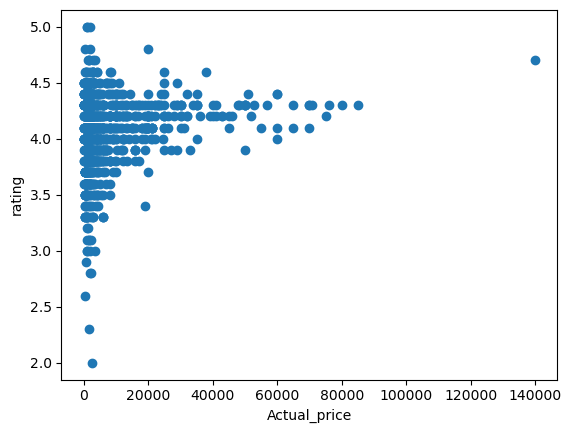

In [59]:
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('rating')
plt.show()

In [60]:
le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()
df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

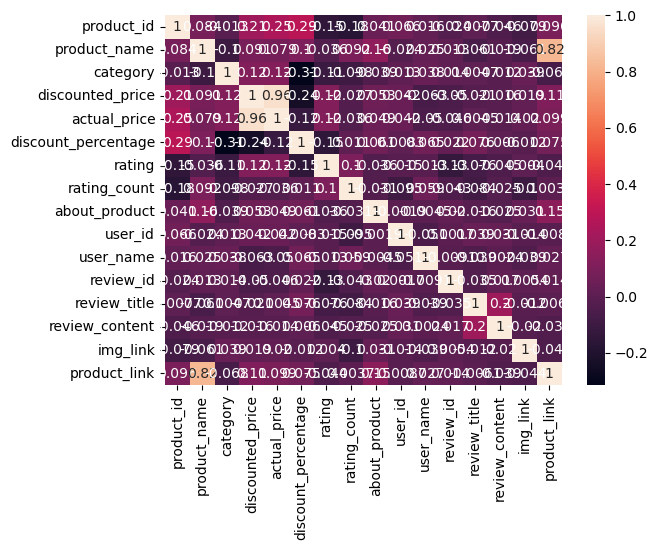

In [61]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.084089 -0.012565          0.206448   
product_name           0.084089      1.000000 -0.103778          0.090665   
category              -0.012565     -0.103778  1.000000          0.119365   
discounted_price       0.206448      0.090665  0.119365          1.000000   
actual_price           0.246733      0.078567  0.122451          0.961915   
discount_percentage    0.289514      0.101913 -0.314465         -0.242412   
rating                -0.149105     -0.035592 -0.109424          0.120386   
rating_count          -0.175530      0.092450 -0.098421         -0.027081   
about_product          0.041404      0.158263 -0.038753          0.052618   
user_id                0.065688     -0.024093  0.012707          0.041731   
user_name              0.016145      0.024598  0.037822         -0.063069   
review_id             -0.024282      0.013492  0.014015         -0.049757   

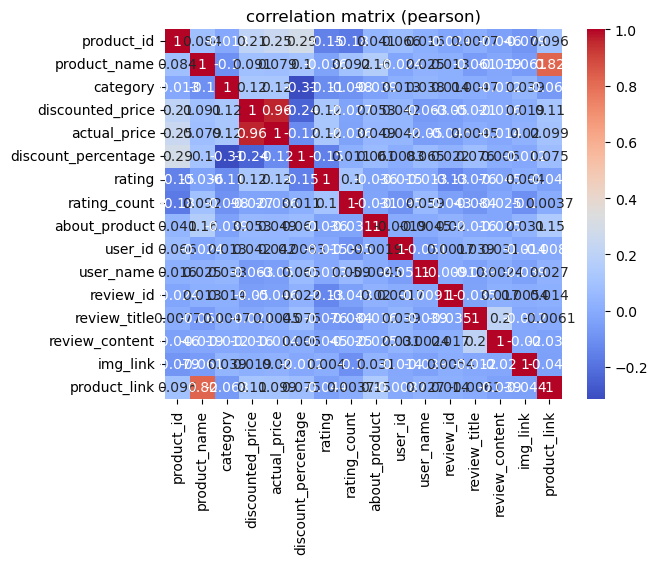

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.083112 -0.013553          0.146237   
product_name           0.083112      1.000000 -0.106193          0.056597   
category              -0.013553     -0.106193  1.000000          0.360733   
discounted_price       0.146237      0.056597  0.360733          1.000000   
actual_price           0.269064      0.105719  0.277291          0.932787   
discount_percentage    0.271879      0.106467 -0.322090         -0.372991   
rating                -0.144268     -0.061395 -0.101758          0.079412   
rating_count          -0.406559      0.128565 -0.171893          0.122296   
about_product          0.041118      0.157675 -0.048319         -0.056144   
user_id                0.065228     -0.023810  0.015389          0.079048   
user_name              0.016859      0.024479  0.038735         -0.018599   
review_id             -0.024644      0.015269  0.016119         -0.048420   

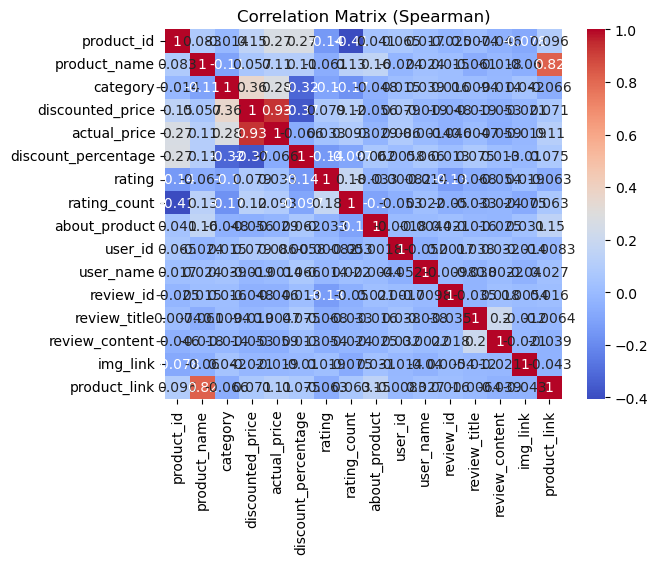

In [62]:
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.title('correlation matrix (pearson)')
plt.show()
spearman_correlation_matrix = df.corr(method="spearman")
print(spearman_correlation_matrix)
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()

In [63]:
correlation_coefficient = np.corrcoef(df['actual_price'], df['rating'])[0, 1]
print(correlation_coefficient)

0.12174449609998372
